# The IQ-OTH/NCCD lung cancer dataset
## Lung Cancer CT Scans from Iraqi hospitals: Normal, Benign, and Malignant Cases

## About Dataset
The Iraq-Oncology Teaching Hospital/National Center for Cancer Diseases (IQ-OTH/NCCD) lung cancer dataset was collected in the above-mentioned specialist hospitals over a period of three months in fall 2019. It includes CT scans of patients diagnosed with lung cancer in different stages, as well as healthy subjects. IQ-OTH/NCCD slides were marked by oncologists and radiologists in these two centers. The dataset contains a total of 1190 images representing CT scan slices of 110 cases. These cases are grouped into three classes: normal, benign, and malignant. of these, 40 cases are diagnosed as malignant; 15 cases diagnosed with benign; and 55 cases classified as normal cases. The CT scans were originally collected in DICOM format. The scanner used is SOMATOM from Siemens. CT protocol includes: 120 kV, slice thickness of 1 mm, with window width ranging from 350 to 1200 HU and window center from 50 to 600 were used for reading. with breath hold at full inspiration. All images were de-identified before performing analysis. Written consent was waived by the oversight review board. The study was approved by the institutional review board of participating medical centers. Each scan contains several slices. The number of these slices range from 80 to 200 slices, each of them represents an image of the human chest with different sides and angles. The 110 cases vary in gender, age, educational attainment, area of residence and living status. Some of them are employees of the Iraqi ministries of Transport and Oil, others are farmers and gainers. Most of them come from places in the middle region of Iraq, particularly, the provinces of Baghdad, Wasit, Diyala, Salahuddin, and Babylon.

if you use this dataset you should cite the following articles:

1- Diagnosis of lung cancer based on CT scans using CNN
can be cited as :
(H. F. Al-Yasriy, M. S. Al-Husieny, F. Y. Mohsen, E. A. Khalil, and Z. S. Hassan, "Diagnosis of Lung Cancer Based on CT Scans Using CNN," IOP Conference Series: Materials Science and Engineering, vol. 928, 2020.)

2- Evaluation of SVM performance in the detection of lung cancer in marked CT scan dataset
can be cited as:
(H. F. Kareem, M. S. A.-Husieny, F. Y. Mohsen, E. A. Khalil, and Z. S. Hassan, “Evaluation of SVM performance in the detection
of lung cancer in marked CT scan dataset,” Indonesian Journal of Electrical Engineering and Computer Science, vol. 21, no. 3,
pp. 1731-1738, 2021, doi: 10.11591/ijeecs.v21.i3.pp1731-1738.)

3- The IQ-OTH/NCCD lung cancer dataset
can be cited as :
(alyasriy, hamdalla; AL-Huseiny, Muayed (2023), “The IQ-OTH/NCCD lung cancer dataset”, Mendeley Data, V4, doi: 10.17632/bhmdr45bh2.4)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import random
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
import tensorflow as tf

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')
pd.set_option('display.max_colwidth', None)

In [2]:
directory = r"lung_cancer_dataset"
categories = ["Bengin cases", "Malignant cases", "Normal cases"]

benign_directory = directory + "/" + categories[0]
malignant_directory = directory + "/" + categories[1]
normal_directory = directory + "/" + categories[2]

In [3]:
# saving the path of all data in dictionary
path_list = []
category_list = []
for category in categories:
    folder_path = os.path.join(directory, category)
    folder_image_contents = os.listdir(folder_path)
    for image_file in folder_image_contents:
        image_file_path = os.path.join(folder_path, image_file)
        path_list.append(image_file_path)
        category_list.append(category)

path_series = pd.Series(path_list, name="filepath")
category_series = pd.Series(category_list, name="category")

image_paths_df = pd.DataFrame(path_series).join(category_series)

image_paths_df.head()        

,filepath,category
0,lung_cancer_dataset\Bengin cases\Bengin case (1).jpg,Bengin cases
1,lung_cancer_dataset\Bengin cases\Bengin case (10).jpg,Bengin cases
2,lung_cancer_dataset\Bengin cases\Bengin case (100).jpg,Bengin cases
3,lung_cancer_dataset\Bengin cases\Bengin case (101).jpg,Bengin cases
4,lung_cancer_dataset\Bengin cases\Bengin case (102).jpg,Bengin cases


# Image resizing

Bengin cases


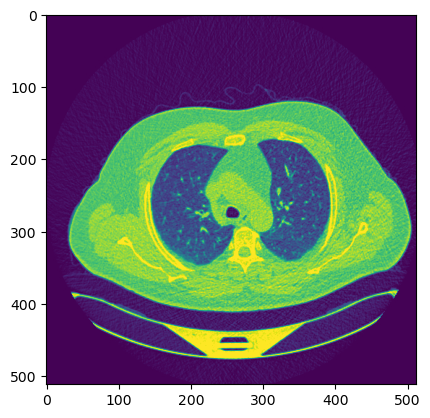

Malignant cases


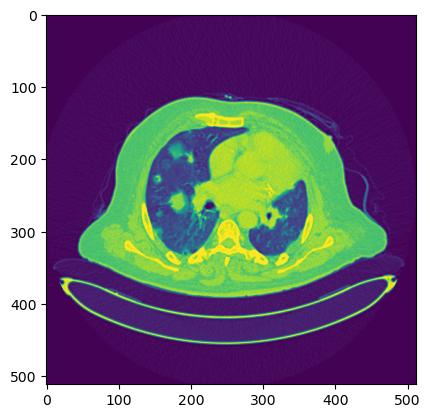

Normal cases


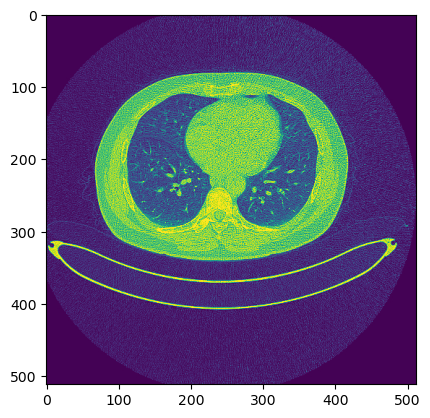

{'Bengin cases': {'512 x 512': 120}, 'Malignant cases': {'512 x 512': 501, '404 x 511': 1, '512 x 801': 28, '512 x 623': 31}, 'Normal cases': {'512 x 512': 415, '331 x 506': 1}}


,Bengin cases,Malignant cases,Normal cases
512 x 512,120.0,501.0,415.0
404 x 511,NaN,1.0,NaN
512 x 801,NaN,28.0,NaN
512 x 623,NaN,31.0,NaN
331 x 506,NaN,NaN,1.0


In [5]:
# read image size and put it into dataframe
size_data = {}
is_grayscale = 0 # enter 0 for color, 1 for grayscale
for category in categories:
    folder_path = os.path.join(directory, category)
    folder_image_contents = os.listdir(folder_path)
    image_sizes_in_one_category = {}
    print(category)
    for image_file in folder_image_contents:
        image_file_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_file_path)
        height, width, channel = img.shape
        if(str(height) + " x " + str(width) in image_sizes_in_one_category):
            image_sizes_in_one_category[str(height) + " x " + str(width)] += 1
        else:
            image_sizes_in_one_category[str(height) + " x " + str(width)] = 1
    plt.imshow(cv2.imread(image_file_path, is_grayscale))
    plt.show()
    size_data[category] = image_sizes_in_one_category
size_data_df = pd.DataFrame(size_data)
print(size_data)
size_data_df.head(10)

Normal cases


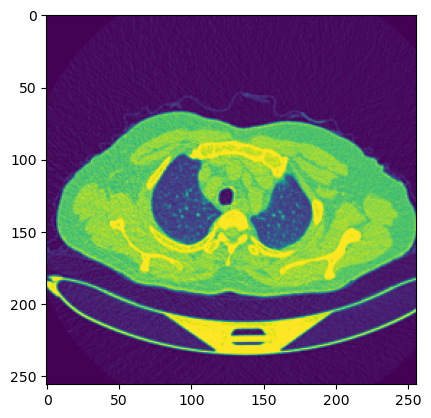

In [6]:
dataset = []
desired_size = 256
for index, row in image_paths_df.iterrows():
    filepath = row["filepath"]
    img = cv2.imread(filepath, is_grayscale)
    img = cv2.resize(img, (desired_size, desired_size))
    label = row["category"]
    dataset.append([img, label])
    
random.shuffle(dataset)

print(dataset[0][1])
plt.imshow(dataset[0][0])
plt.show()

# Image smoothing

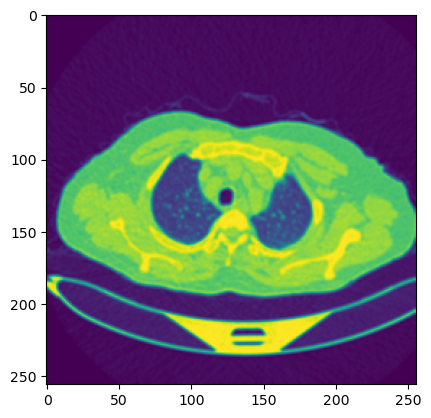

In [8]:
# using gaussian blur
kernel_shape = 3
for data in dataset:
    img = cv2.GaussianBlur(data[0], (kernel_shape, kernel_shape), 0)
    data[0] = img

plt.imshow(dataset[0][0])
plt.show()

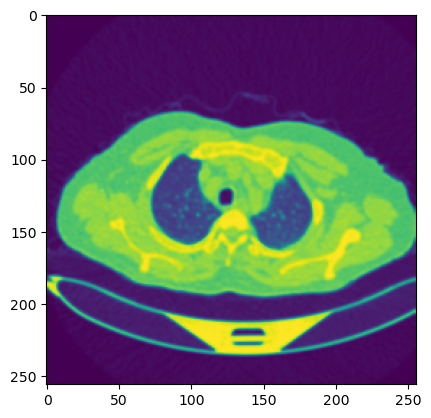

In [9]:
# using bilateral filtering
diameter = 3
sigma_color = 25
sigma_space = 25
for data in dataset:
    img = cv2.bilateralFilter(data[0], diameter, sigma_color, sigma_space)
    data[0] = img

plt.imshow(dataset[0][0])
plt.show()

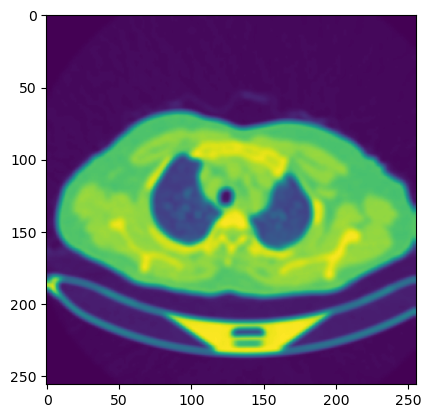

In [10]:
# using 2d convolution
kernel_size = 5
kernel_ = np.ones((kernel_size, kernel_size), np.float32)/(kernel_size*kernel_size)
for data in dataset:
    img = cv2.filter2D(src=data[0], ddepth=-1, kernel=kernel_)
    data[0] = img

plt.imshow(dataset[0][0])
plt.show()

# Data normalization

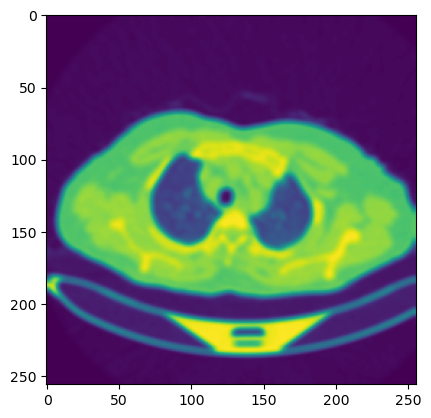

In [12]:
# using min-max scaling
for data in dataset:
    img = data[0]/255.0
    data[0] = img

plt.imshow(dataset[0][0])
plt.show()

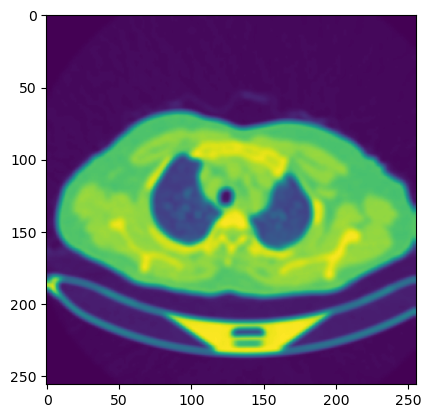

In [13]:
# using standardization
for data in dataset:
    mean, std = cv2.meanStdDev(data[0])
    img = (data[0] - mean) / std
    data[0] = img

plt.imshow(dataset[0][0])
plt.show()

# Data splitting

In [15]:
x, y = [], []
for image, category in dataset:
    x.append(image)
    y.append(category)

x = np.array(x)
y = np.array(y)

# Handling data imbalance

In [17]:
# using SMOTE (like example)
print(x.shape)
number_of_samples = x.shape[0]
x = x.reshape(number_of_samples, -1)
print(x.shape)

print("before: ", Counter(y))

x_smt, y_smt = SMOTE().fit_resample(x, y)

print("after: ", Counter(y_smt))
x = x.reshape(number_of_samples, desired_size, desired_size, 1)
x_smt = x_smt.reshape(x_smt.shape[0], desired_size, desired_size, 1)
print(x.shape)
print(x_smt.shape)

x_smt, x_test, y_smt, y_test = train_test_split(x_smt, y_smt, test_size = 0.2, random_state = 15, stratify=y_smt)
x_train, x_val, y_train, y_val = train_test_split(x_smt, y_smt, test_size = 0.33, random_state = 15, stratify=y_smt)

(1097, 256, 256)
(1097, 65536)
before:  Counter({'Malignant cases': 561, 'Normal cases': 416, 'Bengin cases': 120})
after:  Counter({'Normal cases': 561, 'Malignant cases': 561, 'Bengin cases': 561})
(1097, 256, 256, 1)
(1683, 256, 256, 1)


In [18]:
print(x_smt.shape)
print(y_smt.shape)

print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(1346, 256, 256, 1)
(1346,)
(337, 256, 256, 1)
(337,)
(901, 256, 256, 1)
(901,)
(445, 256, 256, 1)
(445,)


In [19]:
label_encoder = LabelEncoder()

# Convert string categories to integer labels
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# apply one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

y_test_labels = np.argmax(y_test, axis=1)

label_encoder.fit(categories)

for i in range(1, len(label_encoder.classes_)+1):
    print(i, end="")
    print(" = ", end="")
    print(label_encoder.classes_[i-1])

1 = Bengin cases
2 = Malignant cases
3 = Normal cases


In [20]:
# using near miss algorithm
    

In [21]:
# using image augmentation


In [22]:
# using class weightings


In [23]:
# using balanced bagging classifier


In [24]:
# using k-fold cross-validation


# Data models

In [26]:
def all_evaluation(y_test_labels, y_pred_labels):
    # Accuracy, precision, recall, f1 score
    print(metrics.classification_report(y_test_labels, y_pred_labels))
    cm = metrics.confusion_matrix(y_test_labels, y_pred_labels)
    
    print(f"The Cohen's Kappa Score is: {metrics.cohen_kappa_score(y_test_labels, y_pred_labels)}")
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bengin', 'Malignant', 'Normal'],
                yticklabels=['Bengin', 'Malignant', 'Normal'])
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.show()

### Using CNN

In [28]:
model_cnn = Sequential()
model_cnn.add(Conv2D(128, (3, 3), activation="relu", input_shape=x_train.shape[1:]))
model_cnn.add(MaxPooling2D(2, 2))
model_cnn.add(Conv2D(128, (3, 3), 1, activation="relu"))
model_cnn.add(MaxPooling2D(2, 2))
model_cnn.add(Conv2D(64, (3, 3), 1, activation="relu"))
model_cnn.add(MaxPooling2D(2, 2))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dense(3, activation='softmax'))
              
model_cnn.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model_cnn.summary()

C:\Users\ivans\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,969,283 (57.10 MB)

 Trainable params: 14,969,283 (57.10 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# model fitting
history = model_cnn.fit(x_train, y_train, batch_size = 10, epochs = 11, validation_data = (x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 46s 495ms/step - accuracy: 0.5238 - loss: 1.2427 - val_accuracy: 0.8787 - val_loss: 0.3726
Epoch 2/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 46s 509ms/step - accuracy: 0.9327 - loss: 0.2340 - val_accuracy: 0.9618 - val_loss: 0.1312
Epoch 3/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 48s 534ms/step - accuracy: 0.9671 - loss: 0.1098 - val_accuracy: 0.9843 - val_loss: 0.0680
Epoch 4/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 538ms/step - accuracy: 0.9907 - loss: 0.0370 - val_accuracy: 0.9730 - val_loss: 0.0718
Epoch 5/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 535ms/step - accuracy: 0.9830 - loss: 0.0359 - val_accuracy: 0.9303 - val_loss: 0.1646
Epoch 6/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 50s 554ms/step - accuracy: 0.9910 - loss: 0.0356 - val_accuracy: 0.9596 - val_loss: 0.0925
Epoch 7/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 539ms/step - accuracy: 0.9771 - loss: 0.0645 - val_accuracy: 0.9843 - val_loss: 0.0458
Epoch 8/11
91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 543ms/step - accuracy: 0.9887 - loss: 0.0398 - val_accu

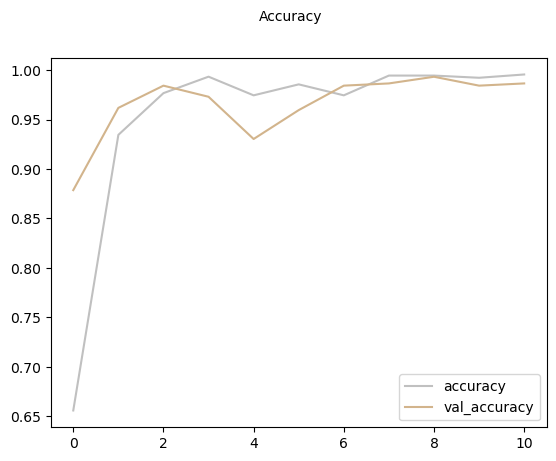

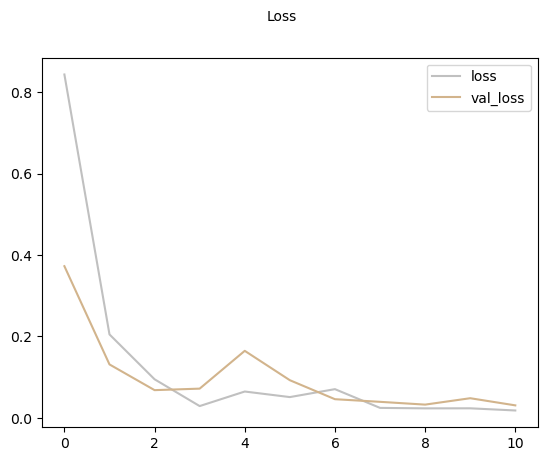

In [30]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='silver', label='accuracy')
plt.plot(history.history['val_accuracy'], color='tan', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=10)
plt.legend(loc="lower right")
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'], color='silver', label='loss')
plt.plot(history.history['val_loss'], color='tan', label='val_loss')
fig.suptitle('Loss', fontsize=10)
plt.legend(loc="upper right")
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       0.97      1.00      0.99       112
           2       1.00      0.96      0.98       112

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337

The Cohen's Kappa Score is: 0.9777440232465988


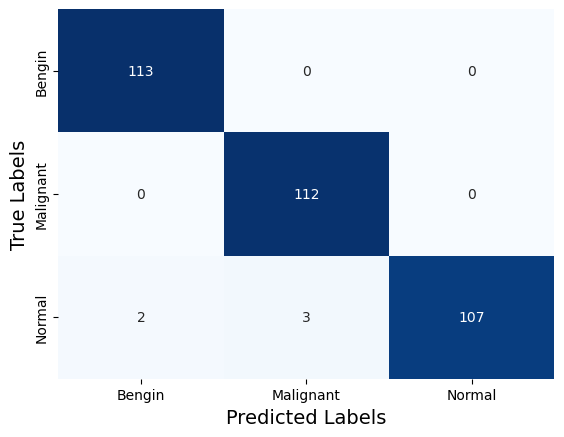

In [31]:
y_pred = model_cnn.predict(x_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

all_evaluation(y_test_labels, y_pred_labels)